<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/DC_Motor_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=02ba383d48674ba196b40dd63164a28e312c903c1670ee6568aca94e95f86365
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


127.14594735106873


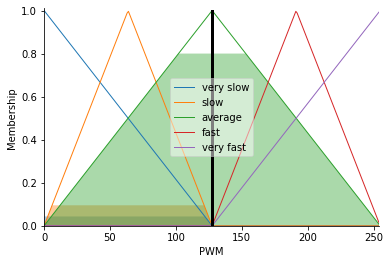

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

setpoint = ctrl.Antecedent(np.arange(12,32,1), 'setpoint') #Khoan nhiet do (12-32 do) 
sensor = ctrl.Antecedent(np.arange(-3,60,1), 'sensor') #nhiet dien tro (khoang gia tri -3-60 do)
PWM = ctrl.Consequent(np.arange(0,255,1),'PWM') #toc do dong co (0-255)

#ham lien thuoc
setpoint['low'] = fuzz.trimf(setpoint.universe, [12,12,22]) #12,12,22 la gia tri cua tam giac
setpoint['medium'] = fuzz.trimf(setpoint.universe, [12,22,32])
setpoint['hight'] = fuzz.trimf(setpoint.universe, [22,32,32])

sensor['very low'] = fuzz.trimf(sensor.universe, [-3,-3,31.5])
sensor['low'] = fuzz.trimf(sensor.universe, [-3,15.75,31.5])
sensor['medium'] = fuzz.trimf(sensor.universe, [15.75,31.5,47.25])
sensor['hight'] = fuzz.trimf(sensor.universe, [31.5,47.25,60])
sensor['very hight'] = fuzz.trimf(sensor.universe, [31.5,60,60])

PWM['very slow'] = fuzz.trimf(PWM.universe, [0,0,127.5])
PWM['slow'] = fuzz.trimf(PWM.universe, [0,63.75,127.5])
PWM['average'] = fuzz.trimf(PWM.universe, [0,127.5,255])
PWM['fast'] = fuzz.trimf(PWM.universe, [127.5,191.25,255])
PWM['very fast'] = fuzz.trimf(PWM.universe, [127.5,255,255])

#make rule
rule1 = ctrl.Rule(setpoint['low'] & sensor['very low'], PWM['very slow'])
rule2 = ctrl.Rule(setpoint['low'] & sensor['low'], PWM['slow'])
rule3 = ctrl.Rule(setpoint['low'] & sensor['medium'], PWM['average'])
rule4 = ctrl.Rule(setpoint['low'] & sensor['hight'], PWM['fast'])
rule5 = ctrl.Rule(setpoint['low'] & sensor['very hight'], PWM['very fast'])

rule6 = ctrl.Rule(setpoint['medium'] & sensor['very low'], PWM['slow'])
rule7 = ctrl.Rule(setpoint['medium'] & sensor['low'], PWM['slow'])
rule8 = ctrl.Rule(setpoint['medium'] & sensor['medium'], PWM['average'])
rule9 = ctrl.Rule(setpoint['medium'] & sensor['hight'], PWM['fast'])
rule10 = ctrl.Rule(setpoint['medium'] & sensor['very hight'], PWM['very fast'])

rule11 = ctrl.Rule(setpoint['hight'] & sensor['very low'], PWM['average'])
rule12 = ctrl.Rule(setpoint['hight'] & sensor['low'], PWM['average'])
rule13 = ctrl.Rule(setpoint['hight'] & sensor['medium'], PWM['average'])
rule14 = ctrl.Rule(setpoint['hight'] & sensor['hight'], PWM['fast'])
rule15 = ctrl.Rule(setpoint['hight'] & sensor['very hight'], PWM['very fast'])

PWM_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                 rule11, rule12, rule13, rule14, rule15])
 
PWM_ing = ctrl.ControlSystemSimulation(PWM_ctrl) 

PWM_ing.input['setpoint'] = 20
PWM_ing.input['sensor'] = 30
PWM_ing.compute()
print(PWM_ing.output['PWM'])
PWM.view(sim = PWM_ing)